In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from copy import deepcopy

C:\Users\matem\Anaconda3\envs\wum-projekt1-presurvcovid19\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### The Netherlands

In [10]:
netherlands = pd.read_excel('../data/42256_2020_253_MOESM1_ESM.xlsx', engine = 'openpyxl')

df = netherlands[["LD", "CRP", "Percentage lymphocytes", "Survival/death"]]
df = df.assign(death = np.where(df["Survival/death"] == 'Alive', 0, 1))
netherlands = df
netherlands['from'] = 'netherlands'
netherlands = netherlands.rename(columns = { 'Percentage lymphocytes':'Lymphocytes', 'LD':'LDH'})
netherlands = netherlands[["LDH", "CRP", "Lymphocytes", "death", "from"]]

### China

In [14]:
import sys
sys.path.append("..")
china = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', engine = 'openpyxl')

from raport_v1.utils_features_selection import data_read_and_split
X_data_all_features, Y_data, x_col = data_read_and_split()
cheng = {'乳酸脱氢酶':'LDH', '超敏C反应蛋白':'CRP', '淋巴细胞(%)':'Lymphocytes'}
blood_df = X_data_all_features[list(cheng.keys())]
blood_df.columns = list(cheng.values())
china = blood_df
china['death'] = Y_data
china['from'] = 'china'
china = china.reset_index(drop = True)

### NY

In [19]:
ny = pd.read_csv('~/Downloads/Yan_reply_First_last_wtime.csv')
y_ny = ny.iloc[:,1]
newyork = ny.iloc[:,[5,6,7]]
newyork['death'] = y_ny
newyork['from'] = 'newyork'
newyork.columns = ['LDH', 'CRP', 'Lymphocytes', 'death', 'from']

## Combining together

In [21]:
nations = china.append([newyork, netherlands])
nations['death'] = nations.death.astype('int')
nations = nations.reset_index(drop=True)
# nations.to_csv("all.csv")

In [25]:
nations.head(3)

,LDH,CRP,Lymphocytes,death,from
0,206.00,2.60,25.90,0,china
1,282.00,27.40,9.20,0,china
2,226.00,3.60,27.30,0,china


### Lazypredict without country of origin

In [106]:
# nations = pd.read_csv('all.csv')
X = nations[['LDH','CRP','Lymphocytes']]
X_train, X_test, y_train, y_test = train_test_split(X, nations.death, test_size = 0.25, random_state = 42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.to_csv("LazyClassifier_results.csv")

#print(models)

100%|██████████| 29/29 [00:01<00:00, 20.11it/s]


In [107]:
models.sort_values("ROC AUC", ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.75,0.71,0.71,0.75,0.12
NearestCentroid,0.70,0.70,0.70,0.71,0.02
KNeighborsClassifier,0.73,0.69,0.69,0.73,0.02
NuSVC,0.73,0.69,0.69,0.73,0.10
ExtraTreesClassifier,0.73,0.69,0.69,0.73,0.15
RandomForestClassifier,0.73,0.68,0.68,0.73,0.20
Perceptron,0.66,0.68,0.68,0.67,0.01
BaggingClassifier,0.73,0.67,0.67,0.72,0.05
LabelPropagation,0.72,0.67,0.67,0.71,0.09


### Lazypredict with country of origin

In [108]:
# nations = pd.read_csv('all.csv')
X = nations[['LDH','CRP','Lymphocytes', "from"]]
X_train, X_test, y_train, y_test = train_test_split(X, nations.death, test_size = 0.25, random_state = 42)

clf_2 = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_2,predictions_2 = clf_2.fit(X_train, X_test, y_train, y_test)
models_2.sort_values("ROC AUC", ascending = False)

100%|██████████| 29/29 [00:01<00:00, 17.86it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.74,0.74,0.78,0.21
XGBClassifier,0.77,0.73,0.73,0.77,0.06
LabelPropagation,0.77,0.73,0.73,0.77,0.10
BaggingClassifier,0.78,0.73,0.73,0.77,0.06
AdaBoostClassifier,0.77,0.73,0.73,0.76,0.13
LGBMClassifier,0.76,0.72,0.72,0.76,0.08
LabelSpreading,0.76,0.72,0.72,0.76,0.13
ExtraTreesClassifier,0.77,0.72,0.72,0.77,0.16
KNeighborsClassifier,0.76,0.72,0.72,0.75,0.03


## DALEX

In [26]:
import dalex as dx
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
nations

,LDH,CRP,Lymphocytes,death,from
0,206.00,2.60,25.90,0,china
1,282.00,27.40,9.20,0,china
2,226.00,3.60,27.30,0,china
3,249.00,14.50,16.50,0,china
4,179.00,0.80,23.60,0,china
...,...,...,...,...,...
1713,416.00,102.00,10.27,0,netherlands
1714,534.00,135.00,4.42,0,netherlands
1715,186.00,20.00,25.10,0,netherlands
1716,230.00,124.00,7.98,0,netherlands


In [126]:
nations.columns

Index(['LDH', 'CRP', 'Lymphocytes', 'death', 'from'], dtype='object')

In [122]:
X = nations.drop("death", axis = 1)

In [154]:
nations = nations.dropna()
X = nations.drop("death", axis = 1)
trees = ExtraTreesClassifier()
parameters = {'max_depth': [None,5,10,15,20,30,50,100,200], 'n_estimators':[10,20,50,100,150,1000]}
one_hot_data = pd.get_dummies(X)

In [155]:
clf = GridSearchCV(trees, parameters)
clf.fit(one_hot_data, nations.death)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 30, 50, 100, 200],
                         'n_estimators': [10, 20, 50, 100, 150, 1000]})

In [156]:
print(clf.best_params_)
best = clf.best_estimator_

{'max_depth': 15, 'n_estimators': 20}


In [157]:
exp = dx.Explainer(clf, one_hot_data, nations['death'])

Preparation of a new explainer is initiated

  -> data              : 1718 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1718 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fd0399df280> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.346, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.647, mean = 1.03e-18, max = 0.726
  -> model_info        : package sklearn

A new explainer has been created!


In [158]:
exp.model_performance()

,recall,precision,f1,accuracy,auc
GridSearchCV,0.89,0.99,0.94,0.96,1.00


In [159]:
exp.model_parts().plot()

In [161]:
nations['from'].unique()

array(['china', 'newyork', 'netherlands'], dtype=object)

In [177]:
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 6/6 [00:00<00:00, 21.84it/s]


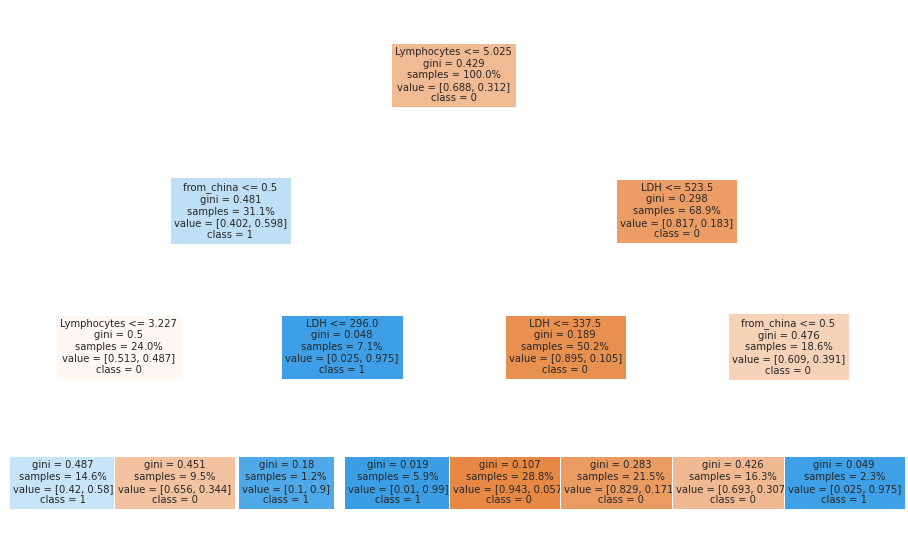

In [182]:
sur = exp.model_surrogate(max_vars=4, max_depth=3)
sur.plot()